# Timing of Gestures

This notebook explores the timing of Gestures for the different labeling types. Whilest the timing of the automatic label type is relatively fixed, the other three types have more distinct timings.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# imports
import pickle
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gestureanalysis.specific_utils as sutils
import gestureanalysis.generate_historgrams as ghi
import gestureanalysis.image_utils as iutils
from gestureanalysis.constants import Constants
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
base_path = "/home/jsimon/Documents/thesis/gesture-analysis/data/"
base_path_raw = base_path+"raw/all"
time_groups_path_corrected_pickl = base_path+"transformed/time_added/all/time-and-groups-corrected-all.pkl"

In [4]:
# check working directory and adopt if needed
import os
os.getcwd()

'/home/jsimon/Documents/thesis/gesture-analysis/scripts'

In [5]:
# in case you need to reload, and know it exists:
with open( time_groups_path_corrected_pickl, "rb" ) as users_pickle_file:
    users = pickle.load(users_pickle_file)

In [6]:
# correct corrupted labels
print(users.keys())
print('num users: ', len(users.keys()))

dict_keys(['AB73', 'AE30', 'AF82', 'AL29', 'AW18', 'CB23', 'CB24', 'CF58', 'DG12', 'DH42', 'DL24', 'JL61', 'JQ28', 'JS52', 'MF20', 'MS55', 'PC29', 'PM32', 'PS42', 'RR45', 'RW32', 'SF1', 'YW13'])
num users:  23


After preprocessing (see Notebook "Data & Preprocessing") we have the timing information in form of a List of `LabelGroup`s saved for each user in the key `lbl_groups_fl`. Each `LabelGroup` object is a group of automatic, manual, dynamic and static label annotations (in form of start and end time) together with the concrete gesture the annotation is annotating. Static is optional, there exist `LabelGroup` object without a static label. The class `LabelGroup` is defined in the module `specific_utils` I usually import into the `sutils` namespace. Several helper functions to filter that list for gestures, get the durations and similar exist in that module.

We define a set of functions who help displaying statistical data of lists of `LabelGroup`s.

In [7]:
def describe_deltas(deltas):
    return scipy.stats.describe(deltas)

def get_deltas(username, userdata, timerange_key):
    return get_deltas_for(username, userdata, None, timerange_key)

def get_deltas_for(username, userdata, gesture, timerange_key):
    lgs = userdata['lbl_groups_fl']
    if gesture is not None:
        lgs = filter(lambda x: x.label_name == gesture, lgs)
        lgs = list(lgs)
        #print(f'got {len(lgs)} records for {gesture}')
    deltas = sutils.get_timedeltas(lgs, timerange_key)
    deltas = map(lambda x: x.total_seconds(), deltas)
    deltas = list(deltas)
    return deltas

def describe_timing(username, userdata, timerange_key):
    deltas = get_deltas(username, userdata, timerange_key)
    return describe_deltas(deltas)
    
def describe_timing_of(username, userdata, gesture, timerange_key):
    deltas = get_deltas_for(username, userdata, gesture, timerange_key)
    return describe_deltas(deltas)

In [8]:
def delta_description_to_df(delta_description, user, df):
    delta_description = list(delta_description)
    delta_description = delta_description[:1] + [delta_description[1][0], delta_description[1][1]] + delta_description[2:]
    dd_t = np.array(delta_description)[None,:]
    d = pd.DataFrame(dd_t, columns=["# Annotations", "min", "max", "mean", "variance", "skewness", "kurtosis"])
    d['user'] = user
    if df is not None:
        df = pd.concat([df, d], ignore_index=True)
    else:
        df = d
    return df

In [9]:
def overal_timings_for(label_type):
    total = []
    df = None
    for key, data in users.items():
        if not 'glove_merged' in data:
            continue
        total = total + get_deltas(key, data, 'manual')
        df = delta_description_to_df(describe_timing(key, data, 'manual'), key, df)
    df = delta_description_to_df(describe_deltas(total), 'all_users', df)
    return df

## Table with overall timings of labels of the manual label type

In [10]:
df = overal_timings_for('manual')
#df.to_latex(index=False)
df

,# Annotations,min,max,mean,variance,skewness,kurtosis,user
0,307.0,0.492,2.016,1.090124,0.081020,0.977200,0.959664,AB73
1,153.0,0.564,2.160,1.071294,0.074505,0.933502,1.332054,AF82
2,308.0,0.276,2.088,1.080935,0.083344,0.464313,0.639929,AL29
3,152.0,0.612,2.244,1.237974,0.116471,0.607737,-0.313408,AW18
4,152.0,0.552,2.496,1.417184,0.101046,0.268666,0.712247,CB23
5,154.0,0.480,1.872,1.031922,0.067122,0.731036,0.679540,CB24
6,158.0,0.504,1.932,1.100127,0.104537,0.650358,-0.092005,CF58
7,154.0,0.180,2.028,0.932416,0.123974,0.856840,0.754349,DG12
8,153.0,0.288,2.460,1.007216,0.165798,1.022538,1.678622,DH42
9,301.0,0.204,2.256,1.289741,0.212006,0.003985,-0.952714,DL24


## Table with overall timings of lables of the dynamic label type

In [11]:
df = overal_timings_for('dynamic')
df

,# Annotations,min,max,mean,variance,skewness,kurtosis,user
0,307.0,0.492,2.016,1.090124,0.081020,0.977200,0.959664,AB73
1,153.0,0.564,2.160,1.071294,0.074505,0.933502,1.332054,AF82
2,308.0,0.276,2.088,1.080935,0.083344,0.464313,0.639929,AL29
3,152.0,0.612,2.244,1.237974,0.116471,0.607737,-0.313408,AW18
4,152.0,0.552,2.496,1.417184,0.101046,0.268666,0.712247,CB23
5,154.0,0.480,1.872,1.031922,0.067122,0.731036,0.679540,CB24
6,158.0,0.504,1.932,1.100127,0.104537,0.650358,-0.092005,CF58
7,154.0,0.180,2.028,0.932416,0.123974,0.856840,0.754349,DG12
8,153.0,0.288,2.460,1.007216,0.165798,1.022538,1.678622,DH42
9,301.0,0.204,2.256,1.289741,0.212006,0.003985,-0.952714,DL24


## Table with overall timings of labels of the static label type

In [12]:
df = overal_timings_for('static')
df

,# Annotations,min,max,mean,variance,skewness,kurtosis,user
0,307.0,0.492,2.016,1.090124,0.081020,0.977200,0.959664,AB73
1,153.0,0.564,2.160,1.071294,0.074505,0.933502,1.332054,AF82
2,308.0,0.276,2.088,1.080935,0.083344,0.464313,0.639929,AL29
3,152.0,0.612,2.244,1.237974,0.116471,0.607737,-0.313408,AW18
4,152.0,0.552,2.496,1.417184,0.101046,0.268666,0.712247,CB23
5,154.0,0.480,1.872,1.031922,0.067122,0.731036,0.679540,CB24
6,158.0,0.504,1.932,1.100127,0.104537,0.650358,-0.092005,CF58
7,154.0,0.180,2.028,0.932416,0.123974,0.856840,0.754349,DG12
8,153.0,0.288,2.460,1.007216,0.165798,1.022538,1.678622,DH42
9,301.0,0.204,2.256,1.289741,0.212006,0.003985,-0.952714,DL24


## Find interesting additionall timings

The tables above show a summary of the timings for the different types of labels in general. Therefor this represents the avarage gesture so do say. One could wonder now if interesting special timings exist for individual gestures. Computing the table for all gesture / user combination would be possible and fast, but would be too much information to consume.

An alternative is, beside the overal describtions above, to search for the extream examples of timing. I therefor search for the gesture with the longest avarage, the shortest avarage, and the highest and lowest variance. I decided to do that for the manual label type.

In [30]:
def total_manual_timing_for(gesture, label_type):
    total = []
    for key, data in users.items():
        if not 'glove_merged' in data:
            continue
        total = total + get_deltas_for(key, data, gesture, label_type)
    return total

def get_all_total_timings(label_type):
    gestures = users['AB73']['label'][0]['data']['gesture'].unique()
    timings = {}
    for gesture in gestures:
        a = np.array(total_manual_timing_for(gesture, label_type))
        timings[gesture] = a
    return timings

def shortest(timings):
    k, v, m = None, None, 10
    for key, val in timings.items():
        if np.mean(val) < m:
            k = key; m = np.mean(val); v = val
    return k, v

def longest(timings):
    k, v, l = None, None, 0
    for key, val in timings.items():
        if np.mean(val) > l:
            k = key; l = np.mean(val); v = val
    return k, v

def least_var(timings):
    k, v, m = None, None, 10
    for key, val in timings.items():
        if np.var(val) < m:
            k = key; m = np.var(val); v = val
    return k, v

def most_var(timings):
    k, v, l = None, None, 0
    for key, val in timings.items():
        if np.var(val) > l:
            k = key; l = np.var(val); v = val
    return k, v

It appears the "Shoot" gesture is the one with the shortest avarage duration with 0.75s on avarage. The "Gasp 1" Gesture on the other hand is the one who has the longest avarage duration with 1.69s on avarage. The "Down" Gesture is the Gesture with the most uniform timing (a variance of 0.03s). The "Grasp 2" gesture on the other hand is the gesture with the highest variance (0.18s). With this we can see that while the timing of different gestures vary a lot the timing of individual gestures even between different people who perform them, vary not too much.

NOTE: I did not have time to explor this in the thesis, but I am sure you can harness that fact f.e. with some kernels of different lenght an so on...

Shoot DescribeResult(nobs=144, minmax=(0.18, 1.86), mean=0.7487499999999999, variance=0.13202527972027972, skewness=0.9236688173497358, kurtosis=0.5626034290731519)


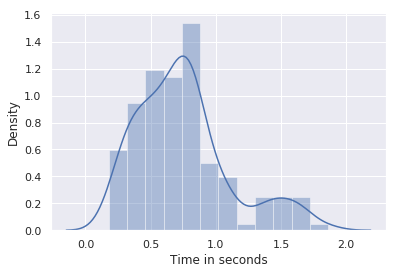

Grasp 1 DescribeResult(nobs=126, minmax=(0.612, 2.568), mean=1.6940952380952383, variance=0.15873656685714282, skewness=-0.09884750589811062, kurtosis=-0.53656151921408)


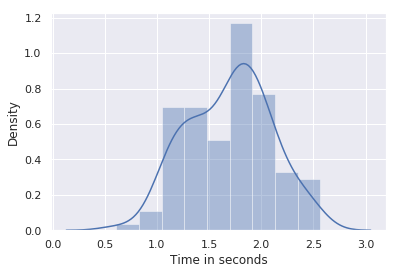

Down DescribeResult(nobs=148, minmax=(0.372, 1.404), mean=0.8203783783783783, variance=0.028839474903474903, skewness=0.685927675313145, kurtosis=1.205921241671458)


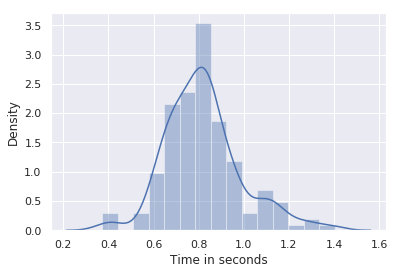

Grasp 2 DescribeResult(nobs=132, minmax=(0.324, 2.412), mean=1.4917272727272726, variance=0.17706752810548232, skewness=-0.19088915345150498, kurtosis=-0.5340134208290879)


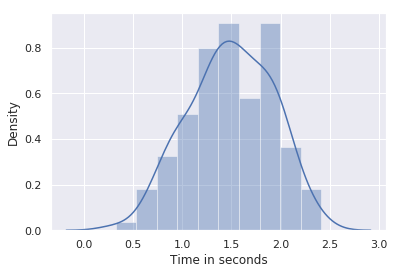

In [23]:
timings = get_all_total_timings('manual')
sns.set(color_codes=True)
user, values = shortest(timings)
print(user, scipy.stats.describe(values))
ax = sns.distplot(values)
ax.set(xlabel='Time in seconds', ylabel='Density')
#plt.hist(values)
plt.show()

user, values = longest(timings)
print(user, scipy.stats.describe(values))
ax = sns.distplot(values)
ax.set(xlabel='Time in seconds', ylabel='Density')
#plt.hist(values)
plt.show()

user, values = least_var(timings)
print(user, scipy.stats.describe(values))
ax = sns.distplot(values)
ax.set(xlabel='Time in seconds', ylabel='Density')
#plt.hist(values)
plt.show()

user, values = most_var(timings)
print(user, scipy.stats.describe(values))
ax = sns.distplot(values)
ax.set(xlabel='Time in seconds', ylabel='Density')
#plt.hist(values)
plt.show()

### Generate Timing histograms for all user / gesture combintions

I generate all timing histograms for each user / gesture combination to have them at hand. This is too much data to be covered in the thesis, but you can look up individual timings out of interest or for reference.

In [15]:
usernames = users.keys()
gestures = users['AB73']['label'][0]['data']['gesture'].unique()
ud_helper = iutils.UserDataHelper(list(usernames), gestures, Constants().raw_headers)

In [16]:
ghi.generate_all_timing_histograms(users, ud_helper)

skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30
skipped #714 image generations


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30
skipped #714 image generations


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30
skipped #714 image generations


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30


skipping userAE30
skipped #714 image generations


## Visualize Timing of Label Types for all users

When I generated all the user gesture combinations I also generated the histograms for the distribution over all gestures and all users for each gesture type. We can see that the automatic gesture type pretty much exactly 3s. The stopping condition is defined as `commulative samples > 3s`, so it depends on the last tramsmissions when exactly the label ends. Dynamic has many very short sequences. Beside that it looks similar to the static and manual label type, although there exist only about 1/3 as many static labels as other label types.

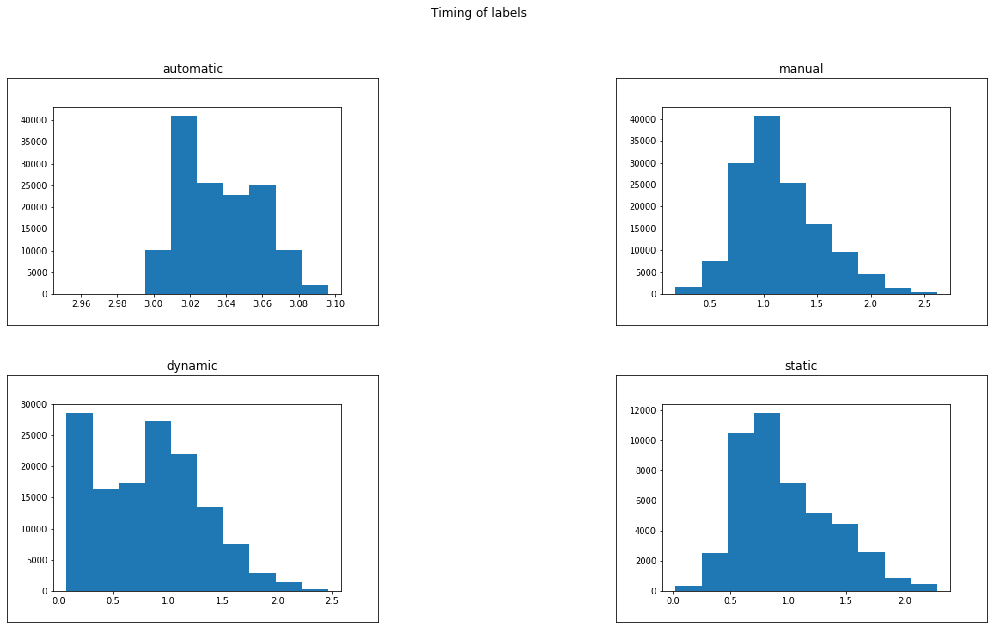

In [17]:
f, axarr = plt.subplots(2, 2, figsize=(20, 10))

axarr[0, 0].set_title(f'automatic')
path = f'../figures/raw/all_users/all_gestures/timing_of_automatic.png'
a = mpimg.imread(path)
axarr[0, 0].imshow(a)
iutils.hide_ticks_in_grid(0,0,axarr)

axarr[0, 1].set_title(f'manual')
path = f'../figures/raw/all_users/all_gestures/timing_of_manual.png'
a = mpimg.imread(path)
axarr[0, 1].imshow(a)
iutils.hide_ticks_in_grid(0,1,axarr)

axarr[1, 0].set_title(f'dynamic')
path = f'../figures/raw/all_users/all_gestures/timing_of_dynamic.png'
a = mpimg.imread(path)
axarr[1, 0].imshow(a)
iutils.hide_ticks_in_grid(1,0,axarr)

axarr[1, 1].set_title(f'static')
path = f'../figures/raw/all_users/all_gestures/timing_of_static.png'
a = mpimg.imread(path)
axarr[1, 1].imshow(a)
iutils.hide_ticks_in_grid(1,1,axarr)

plt.suptitle('Timing of labels')

plt.show()

create a comparison of all timings of all gestures. One bar plot, one violin plot

In [ ]:
# redo the four total timings above to make them beautiful with seaborn:


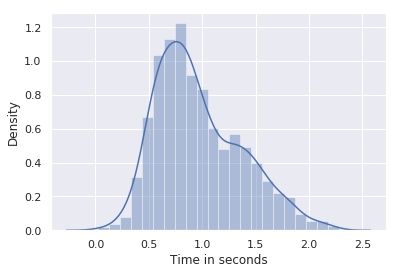

In [35]:
timings = get_all_total_timings('static')
all_timings = []
for key, val in timings.items():
    all_timings += list(val)
ax = sns.distplot(all_timings)
ax.set(xlabel='Time in seconds', ylabel='Density')
#plt.hist(values)
plt.show()

In [19]:
series = []
for key, val in timings.items():
    s = pd.Series(val, name=key)
    series.append(s)
df = pd.concat(series, axis=1)

In [27]:
order = df.mean().sort_values().index

[Text(0, 0.5, 'Time in seconds'), Text(0.5, 0, 'Gesture')]

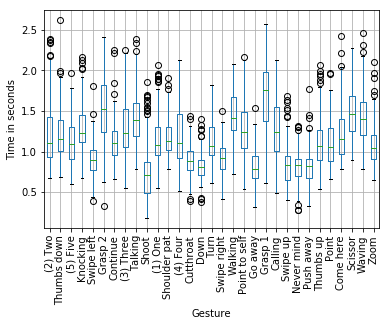

In [29]:
ax = df.boxplot(rot=90)
ax.set(xlabel='Gesture', ylabel='Time in seconds')

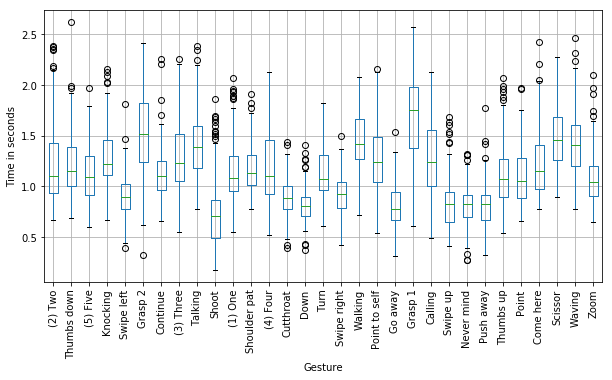

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set(xlabel='Gesture', ylabel='Time in seconds')
df.boxplot(rot=90, ax=ax)
plt.show()

[Text(0, 0, 'Shoot'),
 Text(0, 0, 'Go away'),
 Text(0, 0, 'Push away'),
 Text(0, 0, 'Down'),
 Text(0, 0, 'Never mind'),
 Text(0, 0, 'Swipe up'),
 Text(0, 0, 'Cutthroat'),
 Text(0, 0, 'Swipe left'),
 Text(0, 0, 'Swipe right'),
 Text(0, 0, 'Zoom'),
 Text(0, 0, 'Point'),
 Text(0, 0, 'Continue'),
 Text(0, 0, '(5) Five'),
 Text(0, 0, 'Turn'),
 Text(0, 0, 'Thumbs up'),
 Text(0, 0, '(1) One'),
 Text(0, 0, 'Shoulder pat'),
 Text(0, 0, '(4) Four'),
 Text(0, 0, 'Thumbs down'),
 Text(0, 0, '(2) Two'),
 Text(0, 0, 'Come here'),
 Text(0, 0, 'Point to self'),
 Text(0, 0, '(3) Three'),
 Text(0, 0, 'Knocking'),
 Text(0, 0, 'Calling'),
 Text(0, 0, 'Talking'),
 Text(0, 0, 'Walking'),
 Text(0, 0, 'Waving'),
 Text(0, 0, 'Scissor'),
 Text(0, 0, 'Grasp 2'),
 Text(0, 0, 'Grasp 1')]

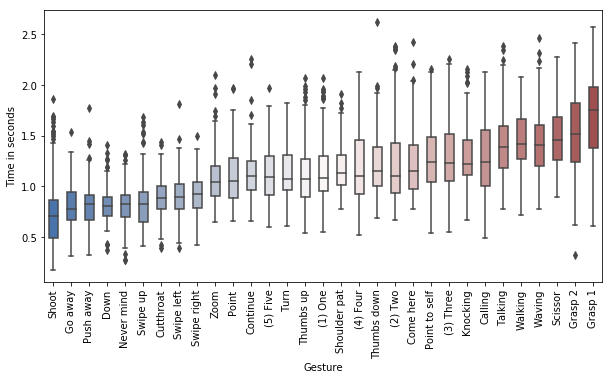

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
bplot=sns.boxplot(data=df, 
                 width=0.5,
                 palette="vlag",
                 order=order,
                 ax=ax)

#bplot=sns.stripplot(data=df, 
#                   jitter=True, 
#                   marker='o', 
#                   alpha=0.3,
#                   color='.3',
#                   order=order,
#                   ax=ax)
ax.set(xlabel='Gesture', ylabel='Time in seconds')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)